In [4]:
import pandas as pd
FinalData = pd.read_csv('../data/FinalData.csv')
FinalData.sample(50)

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,...,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_y
23973,23973,17119,12,12,\N,\N,\N,Mitter,Water leak,1965,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Lotus-Climax
11949,11949,25636,12,11,43,1:39.044,212.341,Vettel,Finished,2022,...,12:00:00,2022-07-22,15:00:00,2022-07-23,11:00:00,2022-07-23,14:00:00,\N,\N,Aston Martin
4562,4562,22350,4,1,58,1:26.608,182.103,Ricciardo,Finished,2014,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Red Bull
10505,10505,5798,16,8,\N,\N,\N,JÃ¤rvilehto,+1 Lap,1993,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Sauber
20626,20626,10902,15,23,\N,\N,\N,Johansson,Fuel system,1983,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Spirit
1180,1180,8555,2,1,\N,\N,\N,Prost,Finished,1988,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
9305,9305,24947,2,2,40,1:41.131,197.707,Bottas,Finished,2020,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Mercedes
22926,22926,16424,3,8,\N,\N,\N,Siffert,Differential,1968,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Lotus-Ford
5553,5553,23100,15,8,68,1:10.138,222.042,Sainz,Finished,2016,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Toro Rosso
22998,22998,15680,13,8,\N,\N,\N,Pescarolo,+3 Laps,1971,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,March-Ford


In [5]:
(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/230) * 100

198.2608695652174

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
# Using grid as X and position as y
X = FinalData['grid'].values.reshape(-1,1)
y = FinalData['positionOrder'].values.reshape(-1,1)
# Splitting the Data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
print(regressor.intercept_)
print(regressor.coef_)

[10.92029414]
[[0.17179897]]


In [10]:
y_pred = regressor.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
predictions


,Actual,Predicted
0,8,12.466485
1,19,15.387067
2,12,11.263892
3,24,13.669078
4,18,12.981882
...,...,...
5163,7,12.294686
5164,10,12.638284
5165,9,14.871670
5166,2,11.951088


<function matplotlib.pyplot.show(close=None, block=None)>

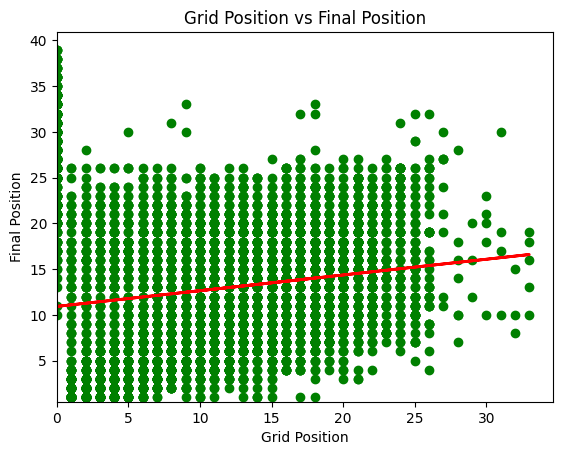

In [27]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Grid Position vs Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.ylim(0.5)
plt.xlim(0)
plt.show

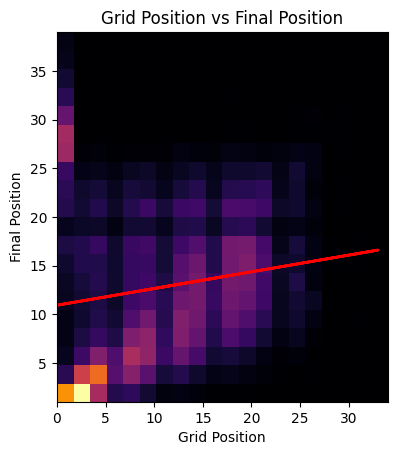

In [20]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
heatmap, xedges, yedges = np.histogram2d(FinalData['grid'],FinalData['positionOrder'], bins=(20))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='inferno')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Grid Position vs Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.ylim(1)
plt.xlim(0)
plt.show()

In [29]:
FinalData.head()

,Unnamed: 0,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,...,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,name_y
0,0,1,1,1,39,1:27.452,218.300,Hamilton,Finished,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
1,1,5,3,5,43,1:27.418,218.385,Kovalainen,Finished,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
2,2,27,9,5,53,1:35.462,209.033,Hamilton,Finished,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
3,3,25,8,3,19,1:35.922,208.031,Kovalainen,Finished,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
4,4,69,5,3,20,1:22.017,204.323,Hamilton,Finished,2008,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,McLaren
